# Exercise 8: Avoiding Ghost States Part Deux

We make the variable transform $x_j \to \bar{x}_j$ where

\begin{eqnarray*}
x_j = \bar{x}_j + \delta \bar{x}_j \\
\delta \bar{x}_j = \xi_1 a^2 \Delta^{(2)} \bar{x}_j + \xi_2 a^2 \omega_0^2 \bar{x}_j + \xi_3 a^2 m\omega_0^3  \bar{x}^3_j 
\end{eqnarray*}

Using

\begin{eqnarray*}
S[x] &=& S[\bar{x}+\delta \bar{x}]\\
&=& S[\bar{x}] + \sum_j \delta \bar{x}_j \frac{\partial S[\bar{x}]}{\partial \bar{x}_j} + \mathcal{O}(a^4)\\
&\equiv& \bar{S}[\bar{x}] + \mathcal{O}(a^4)
\end{eqnarray*}


To determine $\xi_1$, $\xi_2$ and $\xi_3$ we demand that the action has the form

\begin{eqnarray*}
\bar{S}[\bar{x}] &=& a \sum_{j=0}^{N-1} \left[ -\frac{1}{2}m \bar{x}_j \Delta^{(2)} \bar{x}_j + \bar{V}(\bar{x}_j) \right] 
\end{eqnarray*}

with an improved potential containing the second order correction to $\omega_0^2$ 
\begin{eqnarray*}
\bar{V}(\bar{x}_j) = \frac{1}{2}m \omega_0^2 \bar{x}_j^2 \left(1+cm\omega_0^2\bar{x}_j^2\right) +\frac{a^2m \omega^4_0}{24}\left(\bar x +2cm\omega_0 \bar x^3\right)^2 - a\delta v(\bar x) + \frac{a^3}{2}\delta v(\bar x)^2
\end{eqnarray*}
where
\begin{eqnarray*}
\delta v(\bar x) = cm\omega_0^3 \frac{\bar x^2}{4}
\end{eqnarray*}
Making the substitutions we obtain
\begin{eqnarray*}
&&S[\bar{x}] + \sum_j \delta \bar{x}_j \frac{\partial S[\bar{x}]}{\partial \bar{x}_j} \\
&=& am \sum_{j=0}^{N-1} \left[ \overset{(1)}{-\frac{1}{2} \bar{x}_j \Delta^{(2)} \bar{x}_j} + \overset{(2)}{\bar{x}_j  \frac{a^2}{24} (\Delta^{(2)})^2 \bar{x}_j} + \overset{(3)}{\frac{1}{2}\omega_0^2 \bar{x}_j^2} + \overset{(4)}{\frac{c}{2}m^2 \omega_0^3 \bar x^4}\right.\\
&&-\overset{(5)}{\xi_1 a^2\Delta^{(2)} \bar{x}_j   \Delta^{(2)} \bar{x}_j}+\overset{(6)}{\xi_1 a^2\Delta^{(2)} \bar{x}_j\frac{a^2}{12} (\Delta^{(2)})^2\bar{x}_j}+\overset{(7)}{\xi_1 a^2\Delta^{(2)} \bar{x}_j\omega_0^2 \bar x_j}+ \overset{(8)}{2\xi_1 a^2\Delta^{(2)} \bar{x}_jcm\omega_0^3 \bar x_j^3}\\
&&-\overset{(9)}{\xi_2 a^2 \omega_0^2 \bar{x}_j  \Delta^{(2)} \bar{x}_j} + \overset{(10)}{\xi_2 a^2 \omega_0^2 \bar{x}_j \frac{a^2}{12} (\Delta^{(2)})^2\bar{x}_j}+\overset{(11)}{\xi_2 a^2  \bar{x}_j \omega_0^4 \bar x_j^2}+\overset{(12)}{2\xi_2 a^2  cm\omega_0^5\bar x_j^4} \\
&&\left.-\overset{(13)}{\xi_3 a^2 m \omega_0^3 \bar{x}_j^3  \Delta^{(2)} \bar{x}_j} + \overset{(14)}{\xi_3 a^2 m \omega_0^3 \bar{x}_j^3 \frac{a^2}{12} (\Delta^{(2)})^2\bar{x}_j}+\overset{(15)}{\xi_3 a^2 m \omega_0^5 \bar{x}_j^5}+\overset{(16)}{2\xi_3 a^2 cm^2 \omega_0^6 \bar{x}_j^6} \right]
\end{eqnarray*}
We have
\begin{eqnarray*}
&&(1) \text{ is the kinetic term}\\
&&(2)+(5) \text{ Cancel after IBP twice:  }  \xi_1 = \frac{1}{24} \\
&&(3)+(4) \text{ are the first term in the improved potential}\\
&&(1) \text{ Gives the the first part of the second term in the improved potential with:   } \xi_2 = \frac{1}{24}\\
&&(12)+(15) \text{ Gives the the second part of the second term in the improved potential with:   } \xi_3 = \frac{c}{12}\\
&&(16) \text{ Gives the the third part of the second term in the improved potential}\\
&&(7)+(9) \text{ cancel}\\
&&(8)+(13) \text{ cancel}\\
&&(6)+(10)+(14) \text{ are order } a^4
\end{eqnarray*}

### Numerical Test

We rerun our simulation from exercise 6 with the improved potential.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

#Harmonic
def v_aho(x,c):
    
    return (x**2)/2 *(1+c*x**2)

def delv(x, c, m):
    return c*m*(x**2) / 4


### Actions

Once again only the part of the actions containing $x_j$ is computed

In [38]:
def action(x, i, v, m, a, c):
    ir = (i+1)%len(x) 
    il = (i-1)%len(x)
    return a *  v(x[i], c)  + (m/a) * x[i] * (x[i]-x[il]-x[ir])

def action_improved2(x, i, v, m, a, c):
    ir = (i+1)%len(x) 
    il = (i-1)%len(x)
    return a * v(x[i], c)+ (a**2 * m /24.0)*((x[i]+2.0*c*m * x[i]**3)**2) - a* delv(x[i], c, m) + a**3 * (delv(x[i], c, m))**2 / 2 + (m/a) * x[i] * (x[i]-x[il]-x[ir])

### Update function

In [39]:
def update(x, v, m, a, c, dx, action):
    #Updates Every Point Once
    accept = 0
    for i in range(len(x)):
        
        x_old = x[i]
        old_action = action(x=x, i=i, v=v, m=m, a=a, c=c)
        
        x[i] += np.random.uniform(-dx, dx)
        new_action = action(x=x, i=i, v=v, m=m, a=a,  c=c)
        
        diff = old_action - new_action
        
        r = np.minimum(1.0, np.exp(diff))
    
        if r < np.random.rand():
            x[i] = x_old
        
        else:
            accept += 1
    
    return x, accept / len(x)

### Correlator

In [40]:
def G(x):
    #Returns Array Gn = [G1, G2,...]
    n = len(x)
    g = np.zeros(n)
    for j in range(n):
        for i in range(n):
            g[j] += (x[(i+j)%(n)]) *(x[i])
            
    return g/n

### Function to generate ensembles

In [41]:
def markov_chain(n_sites, n_configs, v, m, a, c, dx, n_corr, action):
    
    acceptance = 0
    config = np.zeros((n_sites))
    gn = []
    
    #Thermalise
    for i in range(10*n_corr):
        config = update(config, v, m, a, c, dx, action)[0]


    for i in range(n_configs*n_corr):
        config, acc = update(config, v, m, a, c, dx, action)
        acceptance += acc
        
        if i % n_corr == 0:
            gn.append(G(config))
            
    acceptance = acceptance / (n_configs*n_corr)       
    return gn, acceptance

### Analysis

In [42]:
def binning(g, bin_size):
    g_binned = []
    for i in range(0, len(g), bin_size):
        bin_val = np.mean(g[i:i+bin_size],0)
        g_binned.append(bin_val)

    return g_binned


def analysis(n_sites, n_cfs_arr, v, m, a, c, dx, n_corr, bin_size):
    
    rows = len(n_cfs_arr)
    fig, axs =  plt.subplots(nrows=rows, ncols=2, sharex='col', figsize=(12, 10), dpi=100)
    fig.subplots_adjust(wspace=0.1, hspace=0.2)
    ax = axs.flat
    
    for i, n_configs in enumerate(n_cfs_arr):
        
        gn_improved1, acc1 = markov_chain(n_sites=n_sites, n_configs=n_configs * bin_size, v=v, m=m, a=a, c=c, dx=dx, n_corr=n_corr, action = action)
        gn_improved2, acc2 = markov_chain(n_sites=n_sites, n_configs=n_configs * bin_size, v=v, m=m, a=a, c=c, dx=dx, n_corr=n_corr, action = action_improved2)
        binned_g_improved1 = binning(g=gn_improved1, bin_size=bin_size)
        binned_g_improved2 = binning(g=gn_improved2, bin_size=bin_size)
        
        #############################################################################################
        #Ghost action
        
        avg_binned_improved1 = np.mean(binned_g_improved1, 0)
        err_binned_improved1 = np.std(binned_g_improved1, 0)
        avg_shift_binned_improved1 = np.roll(avg_binned_improved1, -1)
        err_shift_binned_improved1 = np.roll(err_binned_improved1, -1)
        
        E_eff_binned_improved1 = np.log(np.divide(avg_binned_improved1, avg_shift_binned_improved1)) / a
        E_eff_err_binned_improved1 = np.sqrt(np.divide(err_binned_improved1, avg_binned_improved1)**2 + np.divide(err_shift_binned_improved1, avg_shift_binned_improved1)**2)/ a / np.sqrt(n_configs/bin_size)
    
        #############################################################################################
        #Action w/o ghosts
        
        avg_binned_improved2 = np.mean(binned_g_improved2, 0)
        err_binned_improved2 = np.std(binned_g_improved2, 0)
        avg_shift_binned_improved2 = np.roll(avg_binned_improved2, -1)
        err_shift_binned_improved2 = np.roll(err_binned_improved2, -1)
        
        E_eff_binned_improved2 = np.log(np.divide(avg_binned_improved2, avg_shift_binned_improved2)) / a
        E_eff_err_binned_improved2 = np.sqrt(np.divide(err_binned_improved2, avg_binned_improved2)**2 + np.divide(err_shift_binned_improved2, avg_shift_binned_improved2)**2)/ a / np.sqrt(n_configs/bin_size)
    
    
        #############################################################################################
        #PLotting
        t = np.arange(0, n_sites * a, a)
        
        ax[2*i].errorbar(t, E_eff_binned_improved1, yerr=E_eff_err_binned_improved1, fmt='o',  markersize=2, color='k')
        ax[2*i].tick_params(bottom="off", top="off", left="off", right="off")
        ax[2*i].set_title("Unimproved Action Effective Energy for N_configs: " + str(n_configs))
        ax[2*i].set_xlim(0, 3)
        ax[2*i].set_ylim(0,3)
        ax[2*i].set_xticks([0, 1, 3])
        ax[2*i].set_yticks([0, 1, 2, 3])
        #ax[2*i].axhline(y=1, color='r', linestyle='-')
            
        ax[2*i+1].errorbar(t, E_eff_binned_improved2, yerr=E_eff_err_binned_improved2, fmt='o',  markersize=2, color='k')
        ax[2*i+1].tick_params(bottom="off", top="off", left="off", right="off")
        ax[2*i+1].set_title("Modified Potential Effective Energy for N_configs: " + str(n_configs))
        ax[2*i+1].set_xlim(0, 3)
        ax[2*i+1].set_ylim(0, 3)
        ax[2*i+1].set_xticks([0, 1, 3])
        ax[2*i+1].set_yticks([0, 1, 2, 3])
        #ax[2*i+1].axhline(y=1, color='r', linestyle='-')
        
    
        print("Ghost action acceptance Rate: " + str(acc1))
        print("Modified Potential action acceptance Rate: " + str(acc2))
    plt.show()

Ghost action acceptance Rate: 0.4570000000000004
Modified Potential action acceptance Rate: 0.4548000000000001
Ghost action acceptance Rate: 0.45957499999999996
Modified Potential action acceptance Rate: 0.45257499999999934
Ghost action acceptance Rate: 0.45914249999999646
Modified Potential action acceptance Rate: 0.45837750000000177
Ghost action acceptance Rate: 0.4580802499999682
Modified Potential action acceptance Rate: 0.4570502499999772


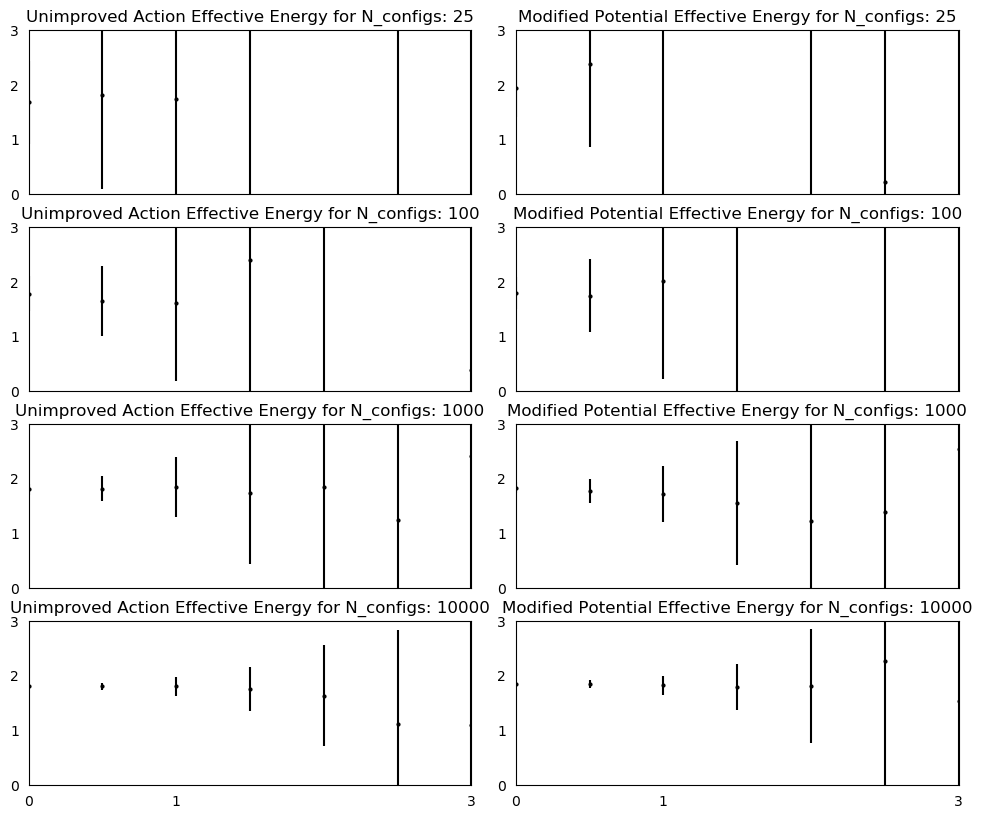

In [43]:
analysis(n_sites=20, n_cfs_arr=[25, 100, 1000, 10000], v=v_aho, m=1, a=0.5, c=2, dx=1.4, n_corr=1, bin_size = 20)